In [1]:
#this notebook is to test training on MNIST dataset

import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
input_size = 28*28
hidden_size = 100
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [4]:
#get MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=torchvision.transforms.ToTensor())

#data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

9913344it [00:01, 8754690.25it/s]                             


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



29696it [00:00, 4328400.46it/s]          

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




1649664it [00:00, 9377530.76it/s]                            


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



5120it [00:00, 20849355.81it/s]         

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



torch.Size([100, 1, 28, 28])


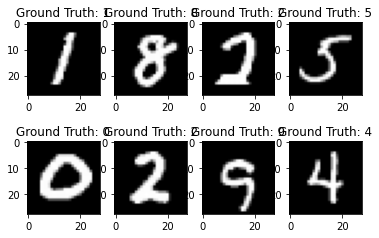

In [7]:
example_data, example_labels = next(iter(train_loader))
print(example_data.shape)
#show example data
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(example_data[i][0], cmap='gray')
    plt.title('Ground Truth: {}'.format(example_labels[i].item()))

In [8]:
#define model
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self,x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [9]:
#create model
model = Net(input_size, hidden_size, num_classes).to(device)
#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [10]:
#training
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i,(images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        #forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.5192
Epoch [1/5], Step [200/600], Loss: 0.2468
Epoch [1/5], Step [300/600], Loss: 0.4216
Epoch [1/5], Step [400/600], Loss: 0.4255
Epoch [1/5], Step [500/600], Loss: 0.2394
Epoch [1/5], Step [600/600], Loss: 0.1976
Epoch [2/5], Step [100/600], Loss: 0.3386
Epoch [2/5], Step [200/600], Loss: 0.1912
Epoch [2/5], Step [300/600], Loss: 0.1223
Epoch [2/5], Step [400/600], Loss: 0.1085
Epoch [2/5], Step [500/600], Loss: 0.0907
Epoch [2/5], Step [600/600], Loss: 0.1332
Epoch [3/5], Step [100/600], Loss: 0.1356
Epoch [3/5], Step [200/600], Loss: 0.0665
Epoch [3/5], Step [300/600], Loss: 0.0807
Epoch [3/5], Step [400/600], Loss: 0.1153
Epoch [3/5], Step [500/600], Loss: 0.0526
Epoch [3/5], Step [600/600], Loss: 0.1290
Epoch [4/5], Step [100/600], Loss: 0.1350
Epoch [4/5], Step [200/600], Loss: 0.0831
Epoch [4/5], Step [300/600], Loss: 0.2133
Epoch [4/5], Step [400/600], Loss: 0.1478
Epoch [4/5], Step [500/600], Loss: 0.1966
Epoch [4/5], Step [600/600], Loss:

In [11]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 97.02 %
